# ガウス過程回帰

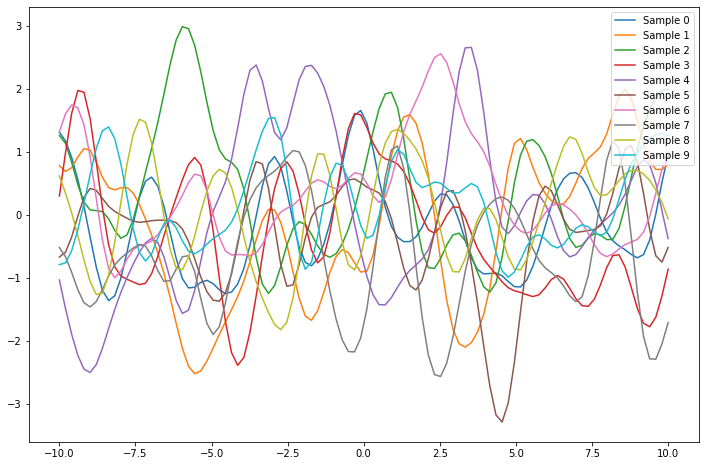

In [16]:
import numpy as np
from matplotlib import pyplot as plt

def mean_function(x):
    return np.zeros_like(x)

def covariance_function(x1, x2, s1, s2):
  #ガウスカーネル
  return np.exp(-(x1 - x2) ** 2 / s1 ** 2)
  
x = np.linspace(-10, 10, 100)
x1, x2 = np.meshgrid(x, x)

sigma = 1.0

m = mean_function(x)
gram_matrix = covariance_function(x1, x2, sigma, 1)

plt.figure(figsize=(12, 8), facecolor='w')

# 関数を10個サンプリングしつつプロット
for k in range(10):
    sample = np.random.multivariate_normal(m, gram_matrix)
    plt.plot(x, sample, label=f'Sample {k}')

plt.legend(loc='upper right')

In [19]:
import numpy as np
import matplotlib.pyplot as plt

class gpr(object):
    def __init__(self, σ):
        self.σ = σ

    def fit(self, x_train, x_test, y):
        X_X_dist = np.sqrt((x_train[:, None] - x_train[None, :]) ** 2)
        K = np.exp((-0.5 * self.σ * X_X_dist))
        K_inv = np.linalg.inv(K)

        X_test_dist = np.sqrt((x_train[:, None] - x_test[None, :]) ** 2)
        k_star = np.exp((-0.5 * self.σ * X_test_dist))

        test_test_dist = np.sqrt((x_test - x_test) ** 2)
        k_star_star = np.exp((-0.5 * self.σ * test_test_dist))  

        y_pred_mean = k_star.T @ K_inv @ y
        y_pred_cov = k_star_star - ((k_star.T @ K_inv) @ k_star)  # 分散共分散行列
        y_pred_std = np.sqrt(np.diag(y_pred_cov))  # 標準偏差
        return y_pred_mean, y_pred_cov, y_pred_std




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semi

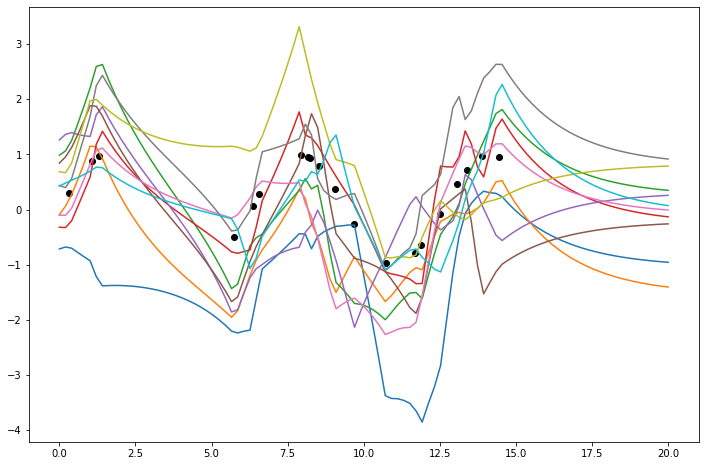

In [21]:
plt.figure(figsize=(12, 8), facecolor='w')

# 関数を10個サンプリングしつつプロット
for k in range(10):
    sample = np.random.multivariate_normal(mu, var)
    plt.plot(x_test, sample, label=f'Sample {k}')

plt.scatter(x_train, y, c="black", marker="o", label="train data")
plt.show()

# 深層ガウス過程回帰

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def calc_kernel_matrix(X, kernel):
  N = len(X)
  K = np.zeros((N, N))
  for i in range(N):
    for j in range(N):
      K[i, j] = kernel(X[i], X[j])

  return K

def calc_kernel_sequence(X, x, kernel):
  N = len(X)
  seq = np.zeros((N))
  for i in range(N):
    seq[i] = kernel(X[i], x)

  return seq

def predict(X_train, Y_train, X, kernel, sigma2_y):
  N = len(X)
  mu = np.zeros((N))
  sigma2 = np.zeros(N)
  N_train = len(Y_train)
  K = calc_kernel_matrix(X_train, kernel)
  invmat = np.linalg.inv(sigma2_y*np.eye(N_train) + K)

  for i in range(N):
    seq = calc_kernel_sequence(X_train, X[i], kernel)
    mu[i] = (seq.reshape(1, N_train) @ invmat) @ Y_train
    sigma2[i] = np.sqrt(sigma2_y + kernel(X[i], X[i]) - mu[i])

  return mu, sigma2


#def plot_predict(X, mu, sigma2):



In [23]:
# input
x_min = - 5.0
x_max = + 5.0
N = 100
X = np.linspace(x_min, x_max, N)

# noise parameter
sigma2_y = 0.01

In [24]:
#ReLuカーネル

rad = lambda x1, x2: np.arccos(np.maximum(np.minimum(x1*x2/np.sqrt(np.linalg.norm(x1)*np.linalg.norm(x2)), 1.0), -1.0))
kernel_r = lambda x1, x2: (1/np.pi)*np.linalg.norm(x1)*np.linalg.norm(x2)*(np.sin(rad(x1, x2)) + (np.pi - rad(x1, x2))*np.cos(rad(x1,x2)))
K_r = calc_kernel_matrix(X, kernel_r)

In [29]:
sigma2_b = 1.0
sigma2_w = 1.5

# 1層のReLuカーネル
rad = lambda x1, x2: np.arccos(np.maximum(np.minimum(x1*x2/np.sqrt(np.linalg.norm(x1)*np.linalg.norm(x2)), 1.0), -1.0))
kernel_l = lambda x1, x2: (1/np.pi)*np.linalg.norm(x1)*np.linalg.norm(x2)*(np.sin(rad(x1, x2)) + (np.pi - rad(x1, x2))*np.cos(rad(x1,x2)))

# 2層のReLuカーネル
rad_l = lambda x1, x2: np.arccos(np.maximum(np.minimum(kernel_l(x1, x2)/np.sqrt(kernel_l(x1, x1)*kernel_l(x2, x2)), 1.0), -1.0))
kernel_ll = lambda x1, x2: sigma2_b + (sigma2_w/(2*np.pi))*np.sqrt(kernel_l(x1, x1)*kernel_l(x2, x2))*(np.sin(rad_l(x1, x2)) + (np.pi - rad_l(x1, x2))*np.cos(rad_l(x1, x2)))

# 3層のReLuカーネル
rad_ll = lambda x1, x2: np.arccos(np.maximum(np.minimum(kernel_ll(x1, x2)/np.sqrt(kernel_ll(x1, x1)*kernel_ll(x2, x2)), 1.0), -1.0))
kernel_lll = lambda x1, x2: sigma2_b + (sigma2_w/(2*np.pi))*np.sqrt(kernel_ll(x1, x1)*kernel_ll(x2, x2))*(np.sin(rad_ll(x1, x2)) + (np.pi - rad_ll(x1, x2))*np.cos(rad_ll(x1, x2)))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  
/usr/loc

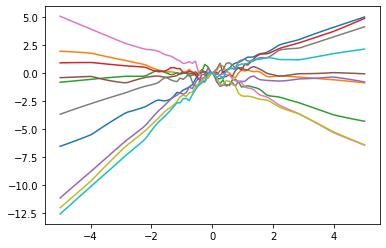

In [26]:
# 1層のReLuカーネル
for i in range(10):
  Y_g = np.random.multivariate_normal(np.zeros((N)), K_r, size=1)
  plt.plot(X, Y_g[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semi

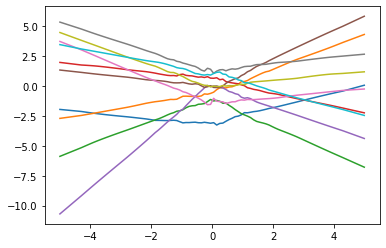

In [27]:
# 2層のReLuカーネル

K_ll = calc_kernel_matrix(X, kernel_ll)
for i in range(10):
  Y_g = np.random.multivariate_normal(np.zeros((N)), K_ll, size=1)
  plt.plot(X, Y_g[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semi

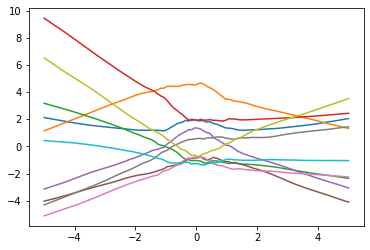

In [28]:
# 3層のReLuカーネル

K_lll = calc_kernel_matrix(X, kernel_lll)
for i in range(10):
  Y_g = np.random.multivariate_normal(np.zeros((N)), K_lll, size=1)
  plt.plot(X, Y_g[0])

In [30]:
# RBF covariance function
alpha = 1.2
beta = 0.5
kernel_g = lambda x1, x2: alpha * np.exp(-0.5*(beta**2)*(x1 - x2)**2)
K_g = calc_kernel_matrix(X, kernel_g)


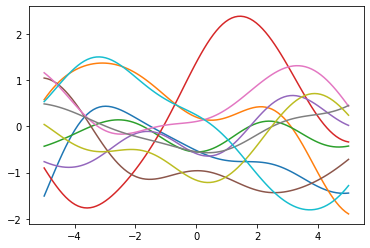

In [32]:
# RBFカーネル

for i in range(10):
  Y_g = np.random.multivariate_normal(np.zeros((N)), K_g, size=1)
  plt.plot(X, Y_g[0])

In [33]:
# training

# data
N_train_all = 40
X_train_all = np.linspace(-3.0, 3.0, N_train_all)
Y_train_all = np.sin(X_train_all)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in sqrt


(-2.0, 2.0)

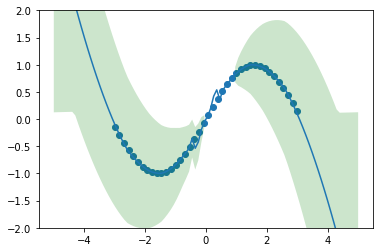

In [34]:
#ReLUカーネルの結果

mu_r, sigma2_r = predict(X_train_all, Y_train_all, X, kernel_r, sigma2_y)
plt.scatter(X_train_all, Y_train_all)
plt.fill_between(X, mu_r + sigma2_r*0.5, mu_r - sigma2_r*0.5, facecolor='green', alpha=0.2, label="confidence")
plt.plot(X, mu_r)
plt.ylim(-2,2)

(-2.0, 2.0)

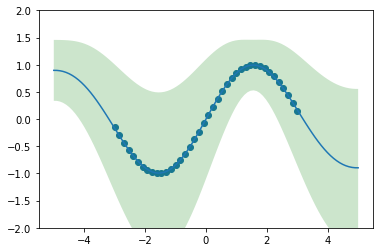

In [35]:
#RBFカーネルの結果

mu_g, sigma2_g = predict(X_train_all, Y_train_all, X, kernel_g, sigma2_y)
plt.scatter(X_train_all, Y_train_all)
plt.fill_between(X, mu_g + sigma2_g, mu_g - sigma2_g, facecolor='green', alpha=0.2, label="confidence")
plt.plot(X, mu_g)
plt.ylim(-2,2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in sqrt


(-2.0, 2.0)

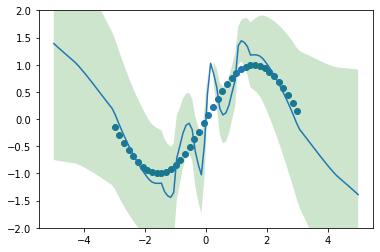

In [37]:
#ReLUカーネルの結果
#2層

mu_ll, sigma2_ll = predict(X_train_all, Y_train_all, X, kernel_ll, sigma2_y)
plt.scatter(X_train_all, Y_train_all)
plt.fill_between(X, mu_ll + sigma2_ll*0.5, mu_ll - sigma2_ll*0.5, facecolor='green', alpha=0.2, label="confidence")
plt.plot(X, mu_ll)
plt.ylim(-2,2)

In [38]:
#ReLUカーネルの結果
#3層

mu_lll, sigma2_lll = predict(X_train_all, Y_train_all, X, kernel_lll, sigma2_y)


(-2.0, 2.0)

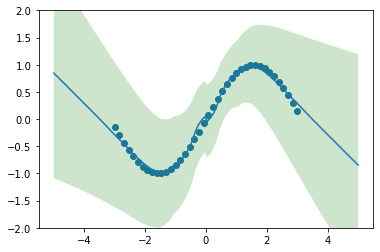

In [39]:
plt.scatter(X_train_all, Y_train_all)
plt.fill_between(X, mu_lll + sigma2_lll*0.5, mu_lll - sigma2_lll*0.5, facecolor='green', alpha=0.2, label="confidence")
plt.plot(X, mu_lll)
plt.ylim(-2,2)